# Plots
In this jupyter notebook we create plots for the paper

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import json
import numpy as np

## Discriminative Task

In [2]:
#get average for VI
vi_path = "results/discriminative/10_runs_vi"
no_coreset = ["0","1","2","3","4"]
coreset_200 = ["5","6","7","8","9"]
coreset_5000 = ["10","11","12","13","14"]
vis = [no_coreset, coreset_200, coreset_5000]
vi_results = {}
for vi in vis:
    samples = len(vi) #should be 5 in this case
    accs = [0] * 10
    for idx in vi:
        path = os.path.join(vi_path,f"VI_{idx}.json")
        with open(path) as f:
            config = json.load(f)
        accs += np.array(config["accuracies"])
        coreset = config["config"]["coreset_size"]
    accs = accs / len(vi)
    vi_results[coreset] = accs
print(vi_results)

#get average results for EWC, LP, SI
path = "results/discriminative/10_runs"
suffix = ["ewc", "lp","si"]
idxs = [0,1,2,3,4,5,6,7,8,9]
results = {}
for suff in suffix:
    samples = len(vi) #should be 5 in this case
    accs = [0] * 10
    for idx in idxs:
        file_path = os.path.join(f"{path}_{suff}",f"{suff.upper()}_{idx}.json")
        with open(file_path) as f:
            config = json.load(f)
        accs += np.array(config["accuracies"])
        key = suff
    accs = accs / len(idxs)
    results[key] = accs
print(results)

{0: array([0.98161998, 0.96993997, 0.96192665, 0.95732998, 0.95031196,
       0.94474998, 0.93362002, 0.92401497, 0.9125222 , 0.90047998]), 200: array([0.98127999, 0.97328998, 0.96855999, 0.964385  , 0.95965599,
       0.95589   , 0.95004573, 0.94402249, 0.93860884, 0.93105798]), 5000: array([0.98099997, 0.97528   , 0.97174001, 0.96937999, 0.96754799,
       0.96561335, 0.96273432, 0.96013   , 0.9576733 , 0.95538397])}
{'ewc': array([0.97673997, 0.95055997, 0.92751334, 0.91382248, 0.90642399,
       0.90074002, 0.88520289, 0.84860996, 0.83561554, 0.815838  ]), 'lp': array([0.97748997, 0.97105997, 0.96231998, 0.95132246, 0.93485398,
       0.92235667, 0.90924713, 0.89769371, 0.88883219, 0.877419  ]), 'si': array([0.97670998, 0.95482999, 0.91764333, 0.90603498, 0.89157798,
       0.87978165, 0.85567003, 0.84821873, 0.83532554, 0.83093799])}


### Plot the arrays

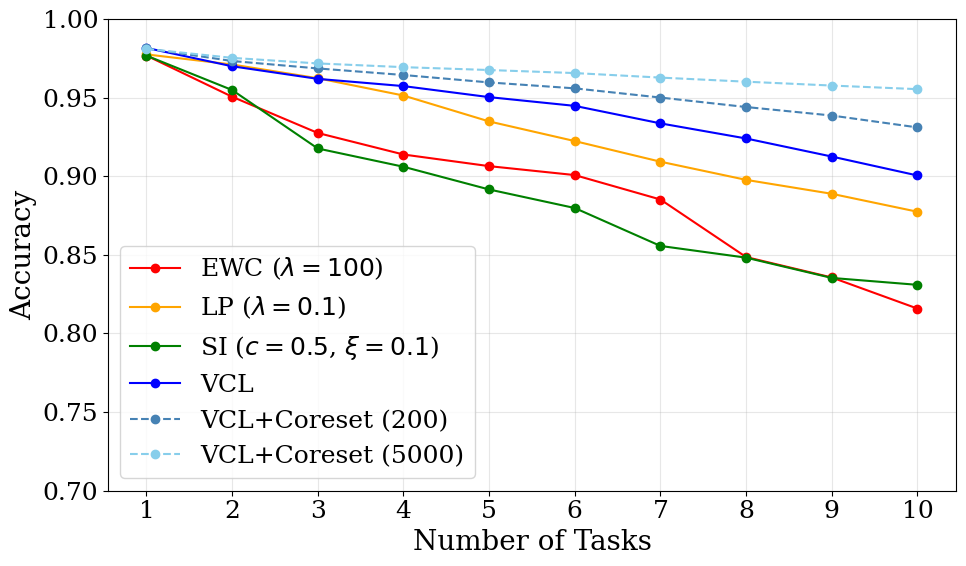

In [3]:
plt.figure(figsize=(10,6))
plt.rcParams.update({
    "font.family": "serif",
    "axes.labelsize": 20,
    "font.size": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
})
plt.xlabel('Number of Tasks')
plt.ylabel('Accuracy')

colors = { "ewc":"red", "lp":"orange", "si":"green", "vcl_0":"blue", "vcl_200": "steelblue", "vcl_5000":"skyblue"}
hyperparams = {
    "ewc": r"($\lambda=100$)",
    "lp":  r"($\lambda=0.1$)",
    "si":  r"($c=0.5$, $\xi=0.1$)"
}


for key, accs in results.items():
    label = key.upper() + " " + hyperparams[key]
    color = colors[key]
    plt.plot([i for i in range(1,11)],accs,label=label, marker='o', color=color)
    plt.legend()

for key, accs in vi_results.items():
    color = colors[f"vcl_{key}"]
    label = f"VCL" + ( f"+Coreset ({key})" if key > 0 else "" )
    linestyle = "-" if key == 0 else "--"
    plt.plot([i for i in range(1,11)],accs,label=label, linestyle=linestyle, marker='o', color=color)
    plt.legend()

plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.ylim(0.7, 1)
plt.tight_layout()

plt.show()

In [4]:
metrics = ["llhs", "uncertainty"]

metric_to_results= {"llhs" : {}, "uncertainty" : {}}
for metric in metrics:
    #get average results for EWC, LP, SI
    path = "results/generative/10_runs"
    suffix = ["ewc", "lp","si", "vi"]
    idxs = [0,1,2,3,4,5,6,7,8,9]
    for suff in suffix:
        accs = [0] * 10
        for idx in idxs:
            file_path = os.path.join(f"{path}_{suff}",f"{suff.upper()}_{idx}.json")
            with open(file_path) as f:
                config = json.load(f)
            train_results = config["results"]
            # now merge the results into an array
            avg_uncertainties = []
            for j in range(10):
                uncertainties = []
                for k in range(j+1):
                    uncertainties.append(train_results[str(k)][metric][j - k])
                avg = sum(uncertainties) / len(uncertainties)
                avg_uncertainties.append(avg)
            accs += np.array(avg_uncertainties)
        accs = accs / len(idxs)
        #print(accs)
        if suff == "vi":
            suff = "vcl"
        metric_to_results[metric][suff] = accs
    
            

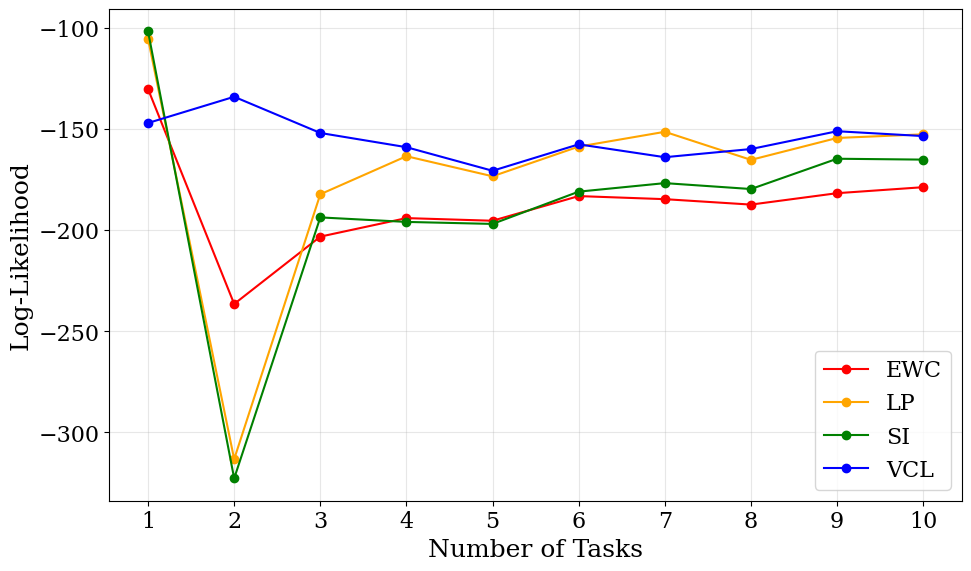

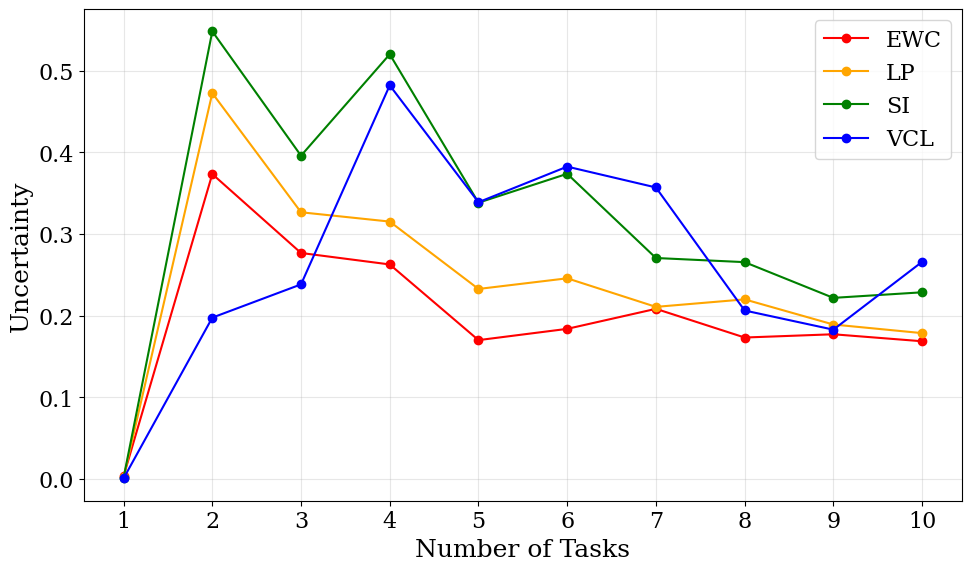

In [5]:
for metric in metrics:
    results = metric_to_results[metric]
    plt.figure(figsize=(10,6))
    plt.rcParams.update({
        "font.family": "serif",
        "axes.labelsize": 18,
        "font.size": 16,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
    })
    plt.xlabel('Number of Tasks')
    if metric == "uncertainty":
        plt.ylabel('Uncertainty')
    elif metric == "llhs":
        plt.ylabel("Log-Likelihood")

    colors = { "ewc":"red", "lp":"orange", "si":"green", "vcl":"blue"}

    for key, accs in results.items():
        label = key.upper()
        color = colors[key]
        plt.plot(range(1,11),accs,label=label, marker='o', color=color)
        plt.legend()


    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.xticks(range(1, 11))    

    plt.show()

In [6]:
metrics = ["llhs", "uncertainty"]

metric_to_results= {"llhs" : {}, "uncertainty" : {}}
for metric in metrics:
    #get average results for EWC, LP, SI
    path = "results/generative/10_runs"
    suffix = ["ewc", "lp","si", "vi"]
    idxs = [0,1,2,3,4,5,6,7,8,9]
    for suff in suffix:
        accs = {}
        for idx in idxs:
            file_path = os.path.join(f"{path}_{suff}",f"{suff.upper()}_{idx}.json")
            with open(file_path) as f:
                config = json.load(f)
            train_results = config["results"]
            # now merge the results into an array
            avg_uncertainties = []
            for i in range(10):
                if i not in accs:
                    accs[i] = np.array([0] * (10-i), dtype="float")
                accs[i] += np.array(train_results[str(i)][metric])
        for i in range(10):
            accs[i] = accs[i] / 10
        #print(accs)
        if suff == "vi":
            suff = "vcl"
        metric_to_results[metric][suff] = accs
    print(metric_to_results)
    
            

{'llhs': {'ewc': {0: array([-130.35795746, -417.21412964, -385.09846802, -388.37066956,
       -384.38144226, -367.25952148, -357.65923157, -375.96731567,
       -369.15785828, -372.20331726]), 1: array([ -55.90027122,  -69.17540627,  -72.96602478,  -88.5090683 ,
        -78.81287079,  -87.43831329, -100.59528809,  -95.12474442,
        -99.7877037 ]), 2: array([-155.5692337 , -172.03917694, -182.47346802, -175.09053345,
       -183.38008423, -195.38790588, -186.6469223 , -192.02685852]), 3: array([-143.13608246, -182.79785919, -165.96061707, -180.84416962,
       -190.25175629, -183.22449799, -191.02321777]), 4: array([-139.02315826, -162.73485413, -179.34153595, -168.23798981,
       -168.1270813 , -159.69449158]), 5: array([-149.64594727, -169.42674408, -178.25516052, -166.29858856,
       -172.01763458]), 6: array([-135.32198029, -171.48973389, -156.87962646, -163.60914612]), 7: array([-119.46149063, -154.96050415, -141.83355103]), 8: array([-155.93762665, -169.31691589]), 9: array

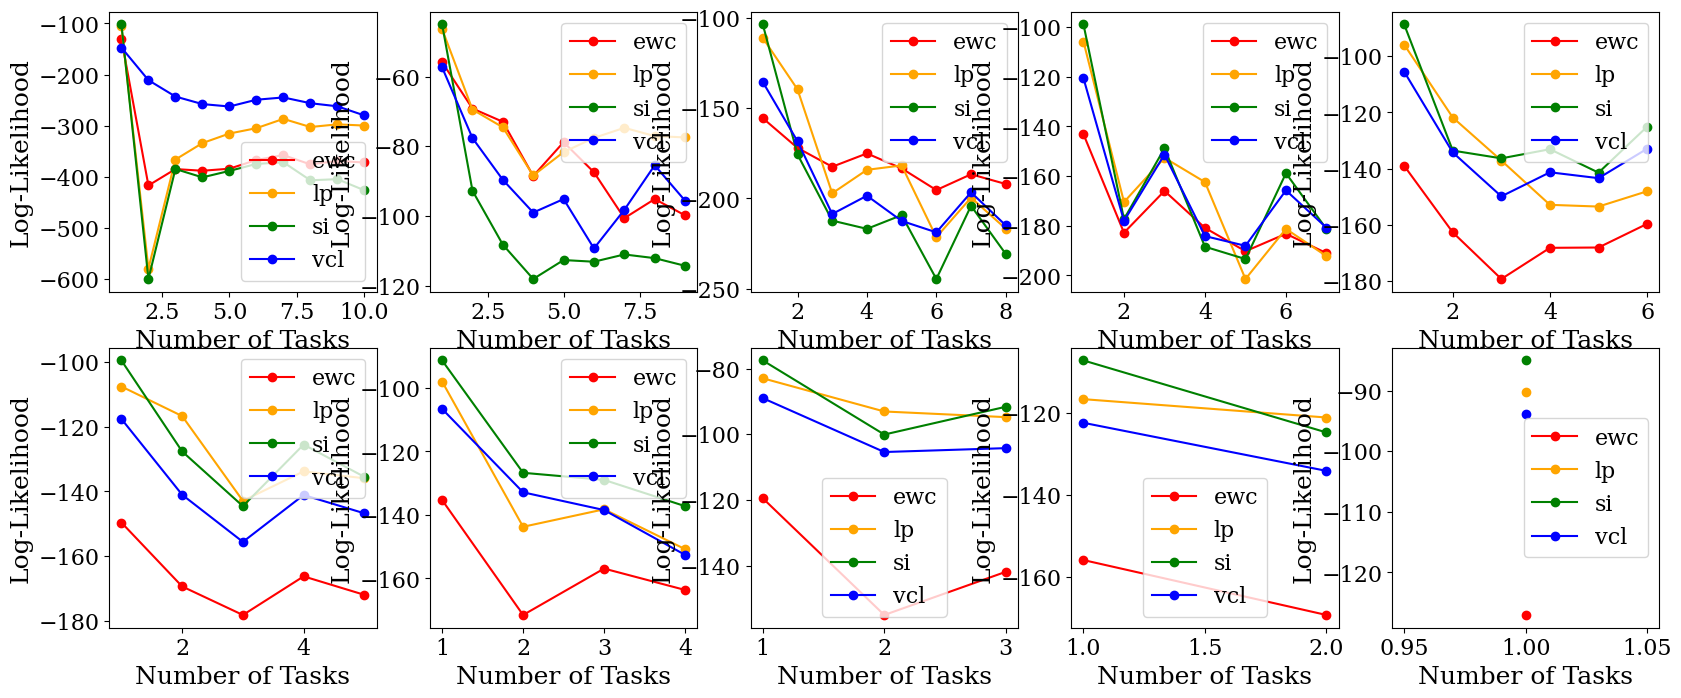

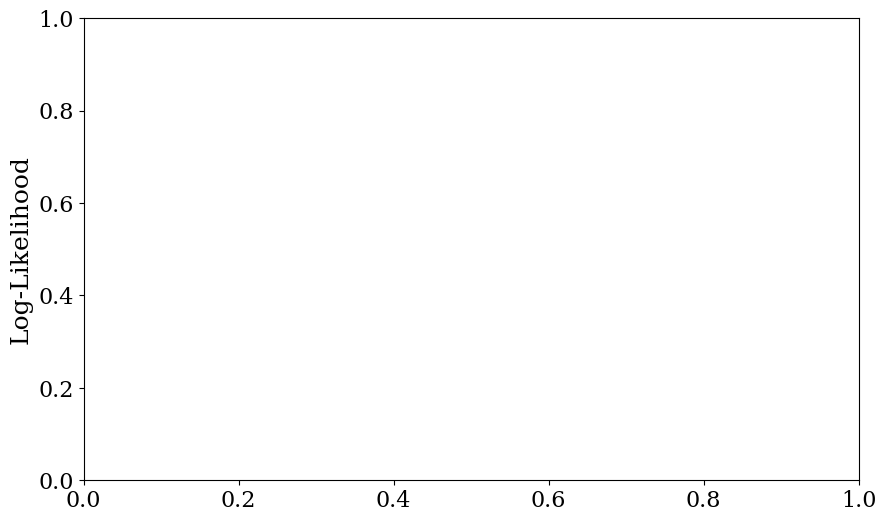

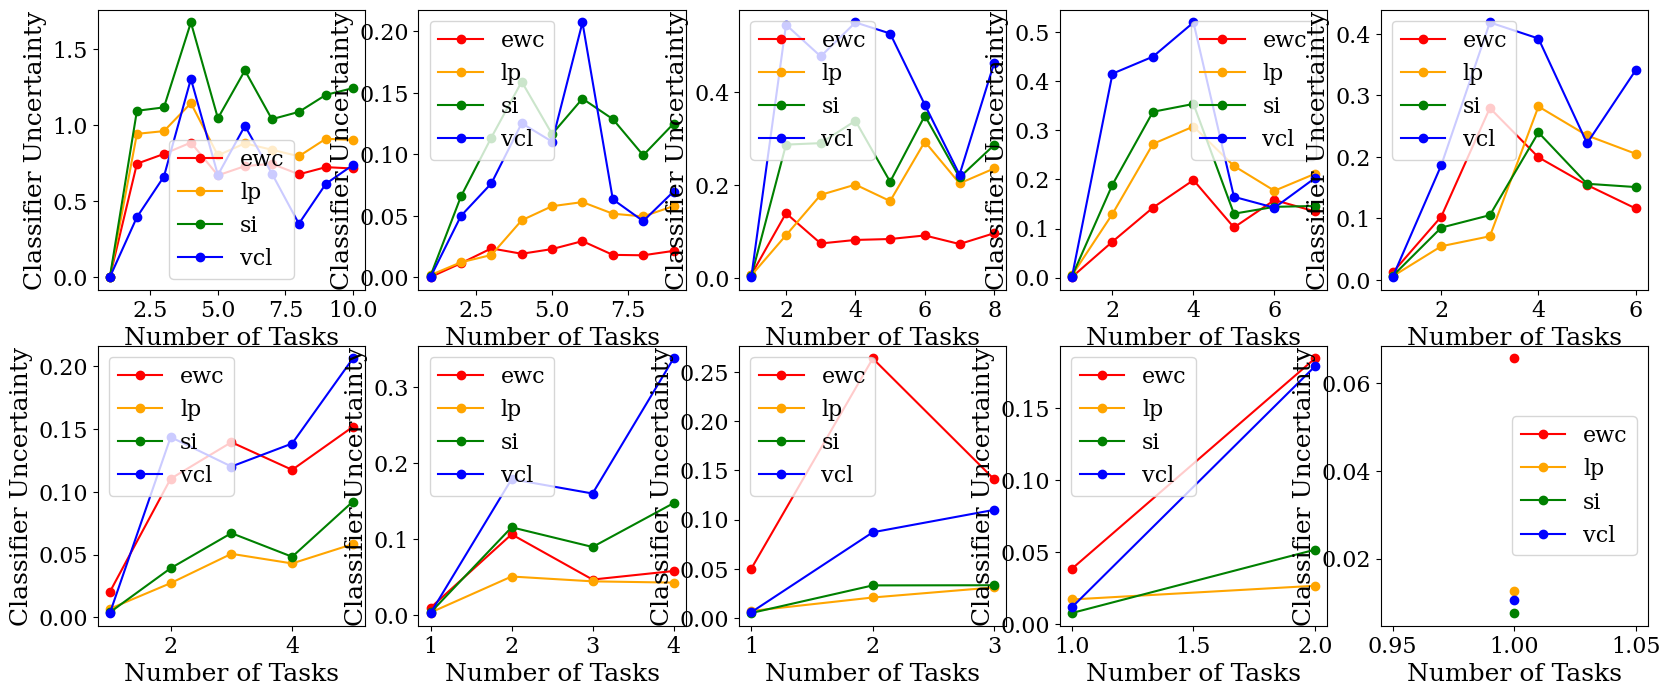

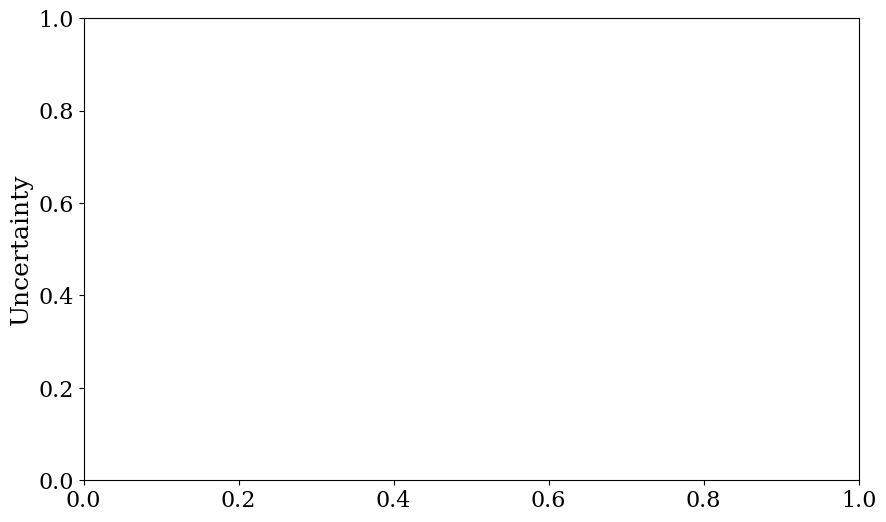

In [7]:
for metric in metrics:
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
    results_digits = metric_to_results[metric]
    plt.figure(figsize=(10,6))
    plt.rcParams.update({
        "font.family": "serif",
        "axes.labelsize": 18,
        "font.size": 16,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
    })
    
    if metric == "uncertainty":
        plt.ylabel('Uncertainty')
    elif metric == "llhs":
        plt.ylabel("Log-Likelihood")
    suffix = ["ewc", "lp","si", "vcl"]
    colors = { "ewc":"red", "lp":"orange", "si":"green", "vcl":"blue"}
    for digit in range(10):
        row = digit // 5
        col = digit % 5
        ax = axes[row, col]
        ax.set_xlabel('Number of Tasks')
        if metric == "llhs":
            ax.set_ylabel("Log-Likelihood")
        else:
            ax.set_ylabel("Classifier Uncertainty")
        for suff in suffix:
            label = suff
            color = colors[suff]
            ax.plot(range(1,10-digit+1),results_digits[suff][digit],label=label, marker='o', color=color)
            ax.legend()



In [8]:
import json
import numpy as np
vi_path = "results/mand_extension/10_runs_vi_final_regression/VI_"
postfix = range(5)
accs =0
for idx in postfix:
    path = vi_path + str(idx)  + ".json"
    with open(path) as f:
        config = json.load(f)
    accs += np.array(config["accuracies"])
print(accs/5)

[0.18462473 0.1932146  0.19517613 0.19560581 0.19796911 0.1985153
 0.19969788 0.2018061  0.20267898 0.20481705]


## My Extension

### Plot the MI during training

In [9]:
#get average results for EWC, LP, SI
path = "results/extension/routing_experiment_1"
suffix = ["gated_VI", "VI_64", "VI_128", "VI_256"]
idxs = [5,5,5,5]
results = {}
for idxs,suff in zip(idxs,suffix):
    samples = len(vi) #should be 5 in this case
    avg_accs = [0] * 10
    for idx in range(idxs):
        file_path = os.path.join(path,f"{suff}_{idx}.json")
        with open(file_path) as f:
            config = json.load(f)
        #now calc the average corrected routed heads
        heads_chosen = config["metrics"]["heads_chosen"]
        accs = []
        for tasks, task_statistics in enumerate(heads_chosen):
            tasks += 1 #task 0 becomes 1 so we know how many tasks were evalutaed
            acc = 0 #init acc
            for id,routing_stat in enumerate(task_statistics):
                acc += routing_stat.get(str(id),0)/10000 #when testing task i, head i should be routed
            acc =acc/tasks #divide the acc by number of tasks we evaluated on
            #print(acc)
            accs.append(acc)
        #print(accs)
        accs = np.array(accs)
        avg_accs += accs
    avg_accs = np.array(avg_accs)
    #print(idxs)
    avg_accs /= idxs
    print(avg_accs)
    results[suff] = avg_accs
        #key = suff
    #accs = accs / len(idxs)
    #results[key] = accs
print(results)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.         1.         0.92970667 0.94344    0.918912   0.87605333
 0.90395429 0.77304    0.73496889 0.702528  ]
[1.         1.         0.99829333 1.         0.999936   0.99141333
 0.93526857 0.89472    0.88579556 0.911616  ]
[1.         1.         1.         0.9884     1.         0.99397333
 0.98605714 0.9416     0.96515556 0.973312  ]
{'gated_VI': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'VI_64': array([1.        , 1.        , 0.92970667, 0.94344   , 0.918912  ,
       0.87605333, 0.90395429, 0.77304   , 0.73496889, 0.702528  ]), 'VI_128': array([1.        , 1.        , 0.99829333, 1.        , 0.999936  ,
       0.99141333, 0.93526857, 0.89472   , 0.88579556, 0.911616  ]), 'VI_256': array([1.        , 1.        , 1.        , 0.9884    , 1.        ,
       0.99397333, 0.98605714, 0.9416    , 0.96515556, 0.973312  ])}


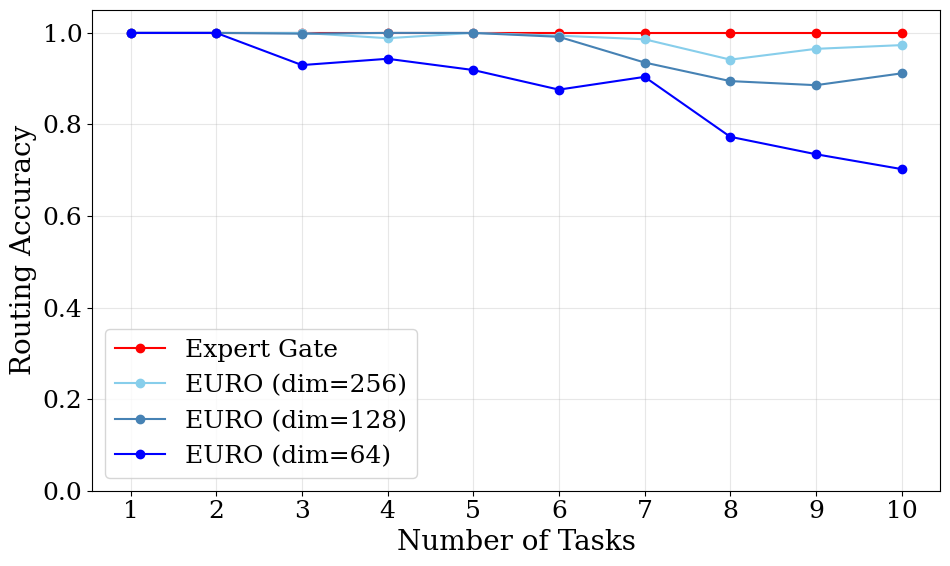

In [10]:

plt.figure(figsize=(10,6))
plt.rcParams.update({
    "font.family": "serif",
    "axes.labelsize": 20,
    "font.size": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
})
plt.xlabel('Number of Tasks')
plt.ylabel("Routing Accuracy")

colors = { "gated_VI":"red", "VI_64":"blue", "VI_128":"steelblue", "VI_256":"skyblue"}
#"vcl_0":"blue", "vcl_200": "steelblue", "vcl_5000":"skyblue"}
labels = { "gated_VI":"Expert Gate","VI_256":"EURO (dim=256)","VI_128":"EURO (dim=128)","VI_64":"EURO (dim=64)"}

for key, label in labels.items():
    color = colors[key]
    accs = results[key]
    linestyle ="-"
    plt.plot(range(1,11),accs,label=label, marker='o', color=color, linestyle=linestyle)
    plt.legend()

plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.ylim(0.0, 1.05)
plt.show()

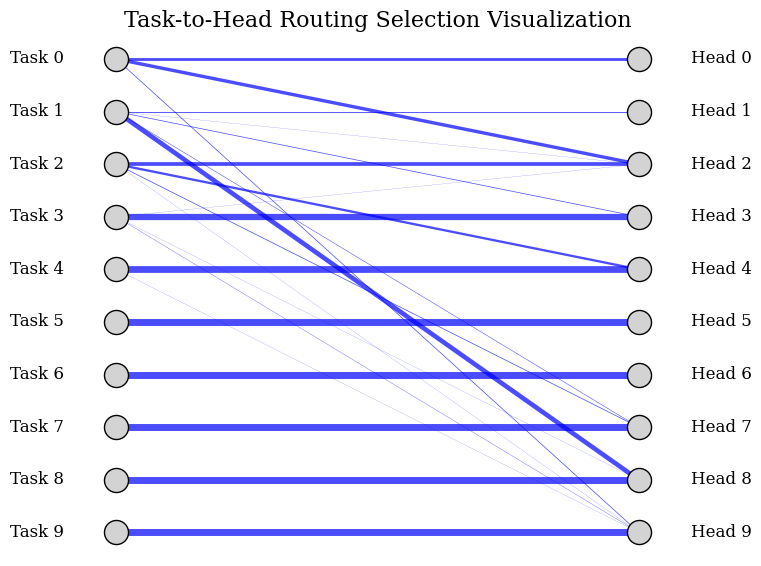

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Single entry from heads_chosen (e.g., the last entry)
entry = [
                {
                    "2": 4880,
                    "0": 4096,
                    "9": 1024
                },
                {
                    "8": 6656,
                    "3": 1024,
                    "1": 1296,
                    "2": 256,
                    "7": 768
                },
                {
                    "4": 3344,
                    "2": 5376,
                    "7": 1024,
                    "9": 256
                },
                {
                    "3": 8976,
                    "8": 256,
                    "2": 256,
                    "9": 512
                },
                {
                    "4": 9744,
                    "9": 256
                },
                {
                    "5": 10000
                },
                {
                    "6": 10000
                },
                {
                    "7": 10000
                },
                {
                    "8": 10000
                },
                {
                    "9": 10000
                }
            ]

# Determine all unique head indices from the entry
unique_heads = set()
for d in entry:
    unique_heads.update(d.keys())
unique_heads = sorted(int(x) for x in unique_heads)

# Number of layers (left nodes) and unique heads (right nodes)
n_layers = len(entry)
n_heads = len(unique_heads)

# Compute y coordinates (vertical positions) for layer nodes (left side) and head nodes (right side)
# We place nodes from top to bottom.
y_layers = np.linspace(n_layers - 1, 0, n_layers)    # Layer 0 at top, layer n_layers-1 at bottom
y_heads = np.linspace(n_heads - 1, 0, n_heads)         # Heads arranged in order

# Create a mapping from head number to y coordinate
head_y_mapping = {head: y for head, y in zip(unique_heads, y_heads)}

plt.figure(figsize=(8, 6))

# Plot layer nodes (left side at x=0)
for i, y in enumerate(y_layers):
    plt.scatter(0, y, s=300, color='lightgray', edgecolors='black', zorder=3)
    plt.text(-0.1, y, f"Task {i}", ha='right', va='center', fontsize=12)

# Plot head nodes (right side at x=1)
for head, y in head_y_mapping.items():
    plt.scatter(1, y, s=300, color='lightgray', edgecolors='black', zorder=3)
    plt.text(1.1, y, f"Head {head}", ha='left', va='center', fontsize=12)

# Draw edges between layers and heads.
# Edge width is proportional to normalized value (value / 10000), scaled by a factor.
scaling = 5  
for layer_idx, d in enumerate(entry):
    total = sum(d.values())
    for head_str, value in d.items():
        head = int(head_str)
        normalized = value / total  # e.g., 2816 becomes 0.2816
        linewidth = normalized * scaling
        plt.plot([0, 1],
                 [y_layers[layer_idx], head_y_mapping[head]],
                 color='blue',
                 linewidth=linewidth,
                 alpha=0.7)

plt.axis('off')
plt.title("Task-to-Head Routing Selection Visualization", fontsize=16)
plt.tight_layout()
plt.show()

## Experiment 2 Bayesian Linear Regression

4700


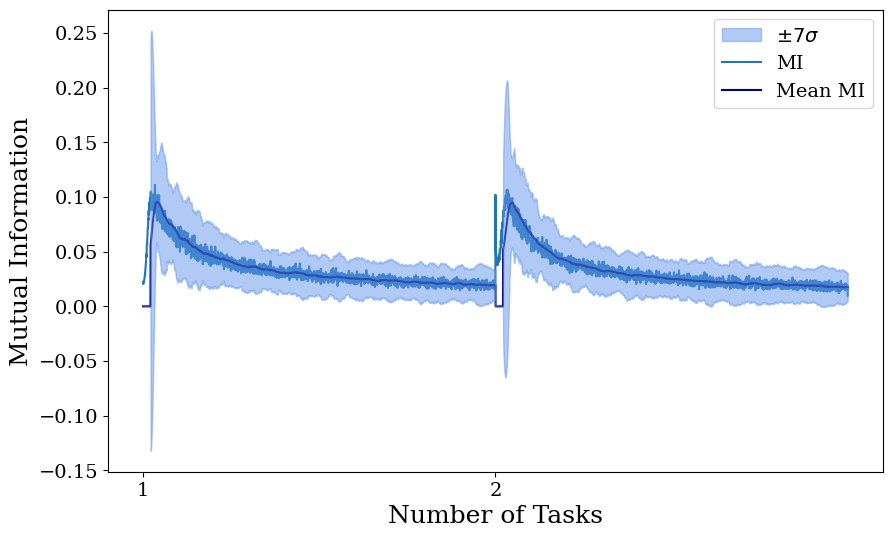

In [12]:
path = "results/extension/detection_experiment_1/VI_run_1.json"
with open(path) as f:
    config = json.load(f)

mutual_info_logs = config["metrics"]["mutual_info"]
means = config["metrics"]["means"]
stds = config["metrics"]["stds"]
batches_per_task = len(mutual_info_logs) / 10

position=2


# Compute tick positions as the center of each task block
tick_positions = [ i*batches_per_task for i in range(position)]

mutual_info_logs = mutual_info_logs[:int(position*batches_per_task)]
means = means[:int(position*batches_per_task)]
stds = stds[:int(position * batches_per_task)]

plt.figure(figsize=(10,6))
plt.rcParams.update({
        "font.family": "serif",
        "axes.labelsize": 18,
        "font.size": 14,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
    })
plt.xlabel('Number of Tasks')
plt.ylabel("Mutual Information")

factor_to_std = {}
factors = [7]
colors = {1: "lightsteelblue", 3: "royalblue", 7: "cornflowerblue"}
alphas = {1: 0.7, 3: 0.3, 7: 0.5}

for factor in factors:
    factor_to_std[factor] = {}
    factor_to_std[factor]["+"] = [mean + factor * std for mean,std in zip(means, stds)]
    factor_to_std[factor]["-"] = [mean - factor * std for mean,std in zip(means, stds)]
    print(len(factor_to_std[factor]["+"]))
    plt.fill_between(range(len(means)), factor_to_std[factor]["-"], factor_to_std[factor]["+"], color=colors[factor], alpha=alphas[factor],label=rf"$\pm{factor}\sigma$", zorder=3)


plt.plot(mutual_info_logs, zorder=1, label="MI")
plt.plot(means, zorder=2, label="Mean MI", color="navy")
plt.xticks(tick_positions, range(1,position+1))

plt.legend()
plt.show()


In [13]:

task_1_last = mutual_info_logs[int(batches_per_task)+1]
task_2_first = mutual_info_logs[int(batches_per_task)]
task_1_last_mean = means[int(batches_per_task)-1]
task_1_last_std = stds[int(batches_per_task)-1]
print(task_1_last)
print(task_2_first)
print("number of stds: ", (task_2_first-task_1_last_mean) / task_1_last_std)

0.05468916520476341
0.10205423831939697
number of stds:  41.49351291962303
